In [1]:
# pip install yfinance

In [2]:
# import all required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read CSV file and stroed into dataframe
file_path = "Resources/NASDAQ_Data_From_2010.csv"
stock_df = pd.read_csv(file_path)

In [4]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,1/4/2010,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,1/5/2010,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,1/6/2010,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,1/7/2010,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,1/8/2010,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [5]:
#The info() method prints information about the DataFrame. 
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       271680 non-null  object 
 1   Open       271680 non-null  float64
 2   High       271680 non-null  float64
 3   Low        271680 non-null  float64
 4   Close      271680 non-null  float64
 5   Adj Close  271680 non-null  float64
 6   Volume     271680 non-null  int64  
 7   Name       271680 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.6+ MB


In [6]:
# Use pandas.to_datetime() to convert string to datetime format
stock_df["Date"] = pd.to_datetime(stock_df["Date"])

In [7]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271680 entries, 0 to 271679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       271680 non-null  datetime64[ns]
 1   Open       271680 non-null  float64       
 2   High       271680 non-null  float64       
 3   Low        271680 non-null  float64       
 4   Close      271680 non-null  float64       
 5   Adj Close  271680 non-null  float64       
 6   Volume     271680 non-null  int64         
 7   Name       271680 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 16.6+ MB


In [8]:
stock_df = stock_df.set_index('Date')
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [9]:
# list of unique name of stocks
stock_name = list(stock_df["Name"].unique())

In [10]:
# numbet of different stock 
no_of_stock = stock_df["Name"].nunique()
no_of_stock

102

In [11]:
# Moving Average : a moving average (rolling average or running average) is a calculation to analyze data points by 
#creating a series of averages of different subsets of the full data set.
# here we are taking number of days for calculation of MA

ma_days  = [10,50,100]

for ma in ma_days:
    column_name = f"MA for {ma} days"
    stock_df[column_name] = stock_df["Adj Close"].rolling(ma).mean()
    

In [12]:
stock_df['5d_future_close'] = stock_df['Adj Close'].shift(-5)
stock_df['5d_close_future_pct'] = stock_df['5d_future_close'].pct_change(5)

In [13]:
# Store all stocks in own Dataframe
for stock in stock_name:
     globals()[stock] = stock_df[stock_df["Name"] == stock]  

In [14]:
CSCO

,Open,High,Low,Close,Adj Close,Volume,Name,MA for 10 days,MA for 50 days,MA for 100 days,5d_future_close,5d_close_future_pct
Date,,,,,,,,,,,,
2010-01-04,24.110001,24.840000,24.010000,24.690001,18.205612,59853700,CSCO,246.851564,254.143313,236.597556,18.131874,-0.004050
2010-01-05,24.600000,24.730000,24.379999,24.580000,18.124498,45124500,CSCO,220.027014,249.454003,234.611501,17.844303,-0.015459
2010-01-06,24.540001,24.740000,24.340000,24.420000,18.006519,35715700,CSCO,193.727666,244.514533,232.598567,18.168736,0.009009
2010-01-07,24.299999,24.570000,24.170000,24.530001,18.087631,31531200,CSCO,168.539429,239.525886,230.534743,18.397324,0.017122
2010-01-08,24.379999,24.700001,24.250000,24.660000,18.183485,39115900,CSCO,143.090776,234.621755,228.504078,17.991772,-0.010543
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-03,59.330002,59.660000,59.279999,59.419998,59.419998,9732200,CSCO,59.157000,55.551853,53.946268,4.350558,-0.926783
2021-09-07,59.240002,59.369999,58.750000,58.880001,58.880001,15503600,CSCO,59.191000,55.675601,54.022244,4.465422,-0.924161
2021-09-08,58.549999,58.930000,58.490002,58.680000,58.680000,13124500,CSCO,59.127000,55.797334,54.084699,4.479669,-0.923659


In [15]:
MSFT

,Open,High,Low,Close,Adj Close,Volume,Name,MA for 10 days,MA for 50 days,MA for 100 days,5d_future_close,5d_close_future_pct
Date,,,,,,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.948717,38409100,MSFT,57.467871,58.696341,53.837519,23.422544,-0.021971
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.956453,49749600,MSFT,53.667517,58.028286,53.626461,23.267786,-0.028747
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.809435,58182400,MSFT,49.929460,57.355692,53.404044,23.484444,-0.013650
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.561821,50559700,MSFT,46.213642,56.694529,53.166963,23.956453,0.016749
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.724321,51197400,MSFT,42.454074,56.043615,52.945392,23.879072,0.006523
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-03,300.989990,302.600006,300.260010,301.140015,301.140015,14747900,MSFT,301.767999,286.932783,269.776794,5.169029,-0.982835
2021-09-07,301.010010,301.089996,298.200012,300.179993,300.179993,17180400,MSFT,301.320999,287.646111,270.194519,5.282441,-0.982402
2021-09-08,299.779999,300.609985,297.470001,300.209992,300.209992,15046800,MSFT,301.079999,288.286180,270.600196,5.239597,-0.982547


In [16]:
stock_1 = CSCO
stock_2 = MSFT

In [17]:
label_1 = stock_1["Name"].unique()
label_2 = stock_2["Name"].unique()

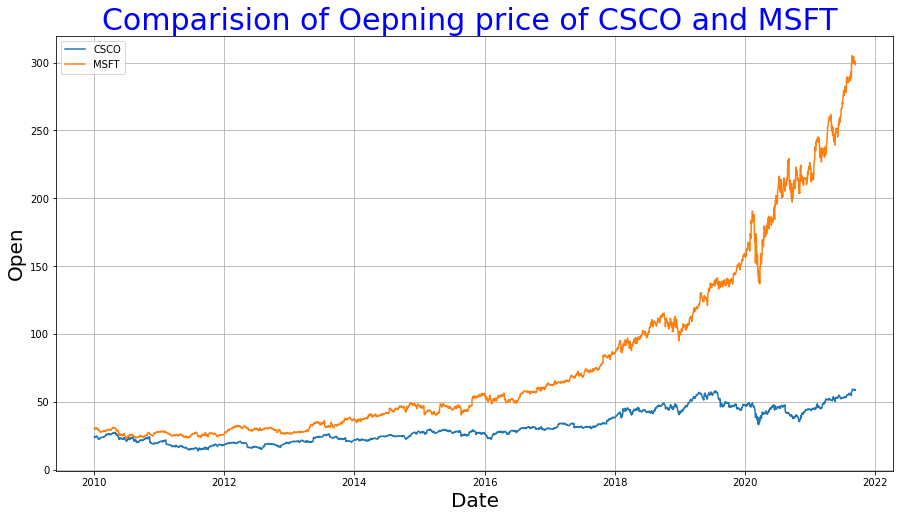

In [18]:
labels = [label_1[0], label_2[0]]
plt.figure(figsize=[15,8])
plt.plot(stock_1.index,stock_1["Open"],stock_2.index,stock_2["Open"])
plt.title(f"Comparision of Oepning price of {label_1[0]} and {label_2[0]} " , fontsize= 30 , color = "Blue")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Open" , fontsize=20,)
plt.grid(True)
plt.legend(labels)
plt.show()

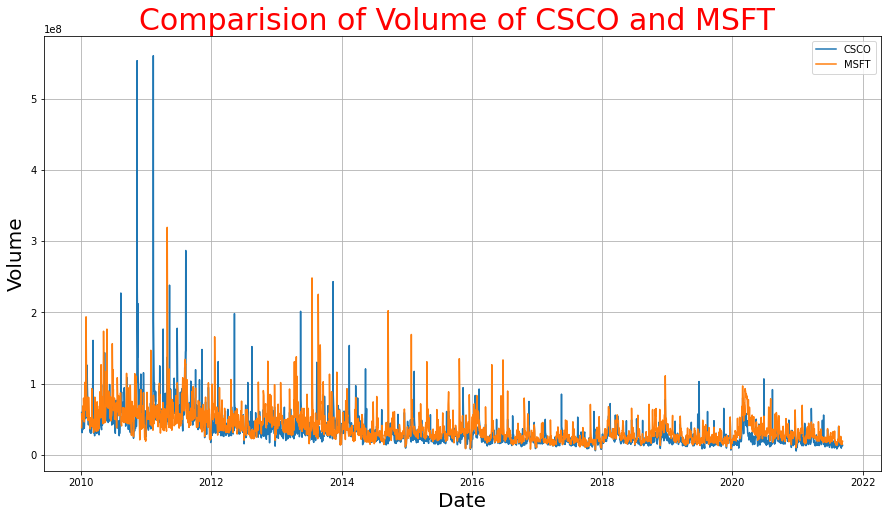

In [19]:
labels = [label_1[0], label_2[0]]
plt.figure(figsize=[15,8])
plt.plot(stock_1.index,stock_1["Volume"],stock_2.index,stock_2["Volume"])
plt.title(f"Comparision of Volume of {label_1[0]} and {label_2[0]} " , fontsize= 30 , color = "Red")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Volume" , fontsize=20,)
plt.grid(True)
plt.legend(labels)
plt.show()

In [20]:
# The adjusted closing price is important because it gives investors a more current and accurate idea of the stock's price. 
#It informs investors of any calculations after a corporate action.

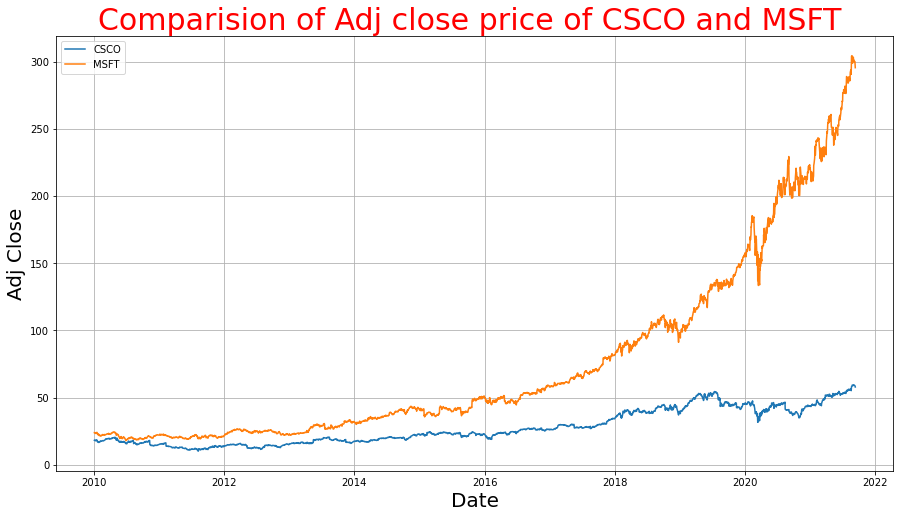

In [21]:
labels = [label_1[0], label_2[0]]
plt.figure(figsize=[15,8])
plt.plot(stock_1.index,stock_1["Adj Close"],stock_2.index,stock_2["Adj Close"])
plt.title(f"Comparision of Adj close price of {label_1[0]} and {label_2[0]} " , fontsize= 30 , color = "Red")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Adj Close" , fontsize=20,)
plt.grid(True)
plt.legend(labels)
plt.show()

In [22]:
# machine learning part to predict the value

In [23]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,Name,MA for 10 days,MA for 50 days,MA for 100 days,5d_future_close,5d_close_future_pct
Date,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL,NaN,NaN,NaN,6.442997,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL,NaN,NaN,NaN,6.369709,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL,NaN,NaN,NaN,6.459555,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL,NaN,NaN,NaN,6.422143,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL,NaN,NaN,NaN,6.314816,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-03,295.325012,301.804993,292.029999,298.290008,298.290008,6127900,ZM,322.196997,361.491599,345.625999,NaN,0.010761
2021-09-07,298.295013,300.980011,294.799988,299.959992,299.959992,4251900,ZM,318.062997,360.041399,345.301799,NaN,0.005134
2021-09-08,299.549988,299.959992,290.529999,293.600006,293.600006,3934400,ZM,313.397998,358.136199,344.938299,NaN,0.026907


In [27]:
stock_df.dropna(inplace=True)
y = stock_1['5d_close_future_pct']
X = stock_1.drop(['5d_close_future_pct','Name'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split
from collections import Counter


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

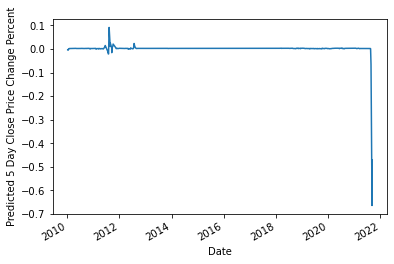

In [41]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

In [36]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',random_state=1)
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [37]:
# Calculate predictions
y_pred = rf_model.predict(X_test)

AttributeError: 'BalancedRandomForestClassifier' object has no attribute 'n_classes_'

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [ ]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test,y_pred)